In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [2]:
print(dataset.target)
print(dataset.target_names)
print(dataset.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [3]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df['target_names'] = df['target'].apply(lambda x: 'Malignant' if x == 0 else 'Benign')

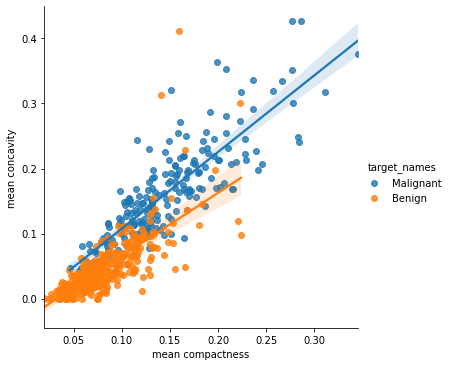

In [7]:
import seaborn
seaborn.lmplot(x = 'mean compactness',y = 'mean concavity',data = df,hue='target_names')

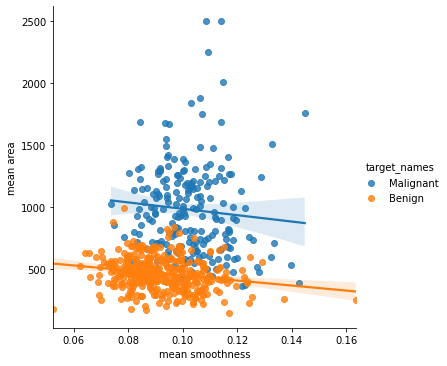

In [8]:
seaborn.lmplot(x = 'mean smoothness',y= 'mean area',data = df,hue='target_names')

In [9]:
columns = df.columns.drop(['target','target_names'])

In [10]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
df_scaled[columns] = StandardScaler().fit_transform(df_scaled[columns])

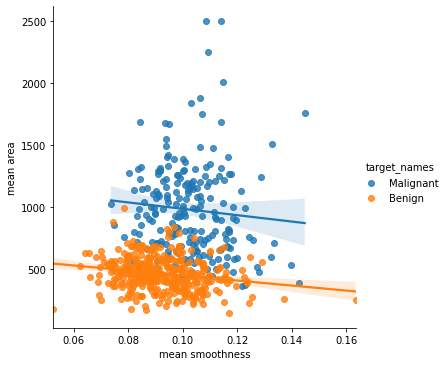

In [11]:
seaborn.lmplot(x = 'mean smoothness',y= 'mean area',data = df,hue='target_names')

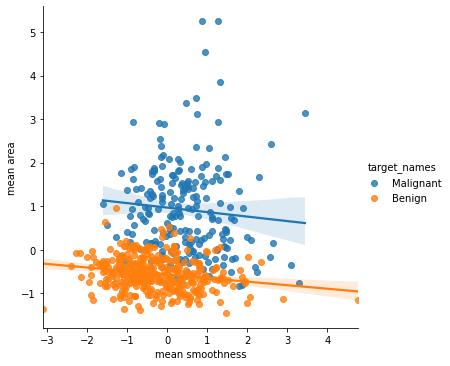

In [12]:
seaborn.lmplot(x = 'mean smoothness',y= 'mean area',data = df_scaled,hue='target_names')

### Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[columns],df['target'],test_size=0.3,random_state=0,stratify=df['target'])

In [14]:
print('complete dataset size:',df.shape)
print('x_train data size:',x_train.shape)
print('y_train dataset size:',y_train.shape)
print('x_test dataset size:',x_test.shape)
print('y_test data size:',y_test.shape)

complete dataset size: (569, 32)
x_train data size: (398, 30)
y_train dataset size: (398,)
x_test dataset size: (171, 30)
y_test data size: (171,)


## KNN Classifier without Standardization

In [15]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

In [16]:
train_scores = []
for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    train_score = cross_val_score(knn, x_train, y_train, cv=5,scoring='accuracy')
    train_scores.append(train_score.mean())

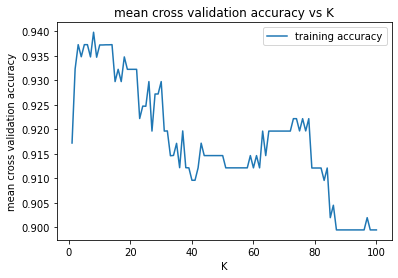

In [17]:
plt.plot(np.arange(1,101),train_scores,label='training accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('mean cross validation accuracy')
plt.title('mean cross validation accuracy vs K')
plt.show()

In [18]:
print('Best number of nearest neighbors using train data:',train_scores.index(max(train_scores))+1) 
# +1 since the indexing of list starts from 0 and we are testing K's from 1.
print('Highest Cross validation Score:',max(train_scores))

Best number of nearest neighbors using train data: 8
Highest Cross validation Score: 0.9397784810126583


In [19]:
from sklearn.model_selection import cross_validate
train_scores = []
validation_scores = []
for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_validate(knn, x_train, y_train, cv=5,scoring='accuracy',return_train_score=True)
    train_scores.append(score['train_score'].mean())
    validation_scores.append(score['test_score'].mean())

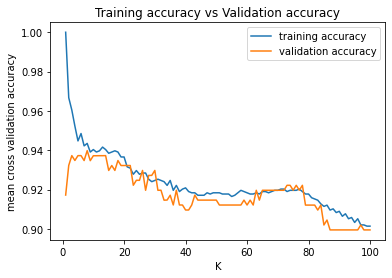

In [20]:
plt.plot(np.arange(1,101),train_scores,label='training accuracy')
plt.plot(np.arange(1,101),validation_scores,label='validation accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('mean cross validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.show()

Just to get a closer view, we sweep K values from 1 to 20.

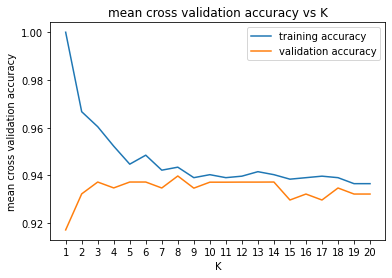

In [21]:
train_scores = []
validation_scores = []
for i in range(1,21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_validate(knn, x_train, y_train, cv=5,scoring='accuracy',return_train_score=True)
    train_scores.append(score['train_score'].mean())
    validation_scores.append(score['test_score'].mean())
plt.plot(np.arange(1,21),train_scores,label='training accuracy')
plt.plot(np.arange(1,21),validation_scores,label='validation accuracy')
plt.xticks(np.arange(1,21))
plt.legend()
plt.xlabel('K')
plt.ylabel('mean cross validation accuracy')
plt.title('mean cross validation accuracy vs K')
plt.show()

**The model gives best results at K = 8**

## Feature Selection


In [22]:
def knn(x,y):
    scores = []
    for k in range(1,51): #for k in range(1,101):        to sweep k from 1 t0 100.
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, x, y_train, cv=5)
        scores.append(score.mean())
    return max(scores)

In [23]:
def Feature_selector (training_data, target_data, threshold=0.95):

### YOUR CODE HERE ###
### HINT: use two nested for loops to implement your function
  features = training_data.columns.tolist()
  y = np.array(target_data)
  scores=[]
  Removed_features_list = []
  Cross_validation_accuracy = []
  highest_cvs = knn(np.array(training_data),y)
  print('cv_score with all features is:',highest_cvs)
  while(len(features)>0):
      print('length of features is',len(features))
      for i in features:
          X = training_data.drop(i,axis=1)
          print('knn running after removal of',i,'feature')
          cv = knn(np.array(X),y)
          scores.append(cv)
      print('length of scores',len(scores))
      max_cv = max(scores)
      Cross_validation_accuracy.append(max_cv)
      if (max_cv >= threshold*highest_cvs):
          excluded_feature = features[scores.index(max_cv)]
          scores.clear()
          Removed_features_list.append(excluded_feature)
          features.remove(excluded_feature)
          print('feature',excluded_feature,'is removed')
      else:
          scores.clear()
          print('feature',excluded_feature,'is stored')
          break           

  return Removed_features_list , Cross_validation_accuracy

In [24]:
removed_list_train,cross_val_train = Feature_selector(x_train,y_train,threshold=0.95)

cv_score with all features is: 0.9397784810126583
length of features is 30
knn running after removal of mean radius feature
knn running after removal of mean texture feature
knn running after removal of mean perimeter feature
knn running after removal of mean area feature
knn running after removal of mean smoothness feature
knn running after removal of mean compactness feature
knn running after removal of mean concavity feature
knn running after removal of mean concave points feature
knn running after removal of mean symmetry feature
knn running after removal of mean fractal dimension feature
knn running after removal of radius error feature
knn running after removal of texture error feature
knn running after removal of perimeter error feature
knn running after removal of area error feature
knn running after removal of smoothness error feature
knn running after removal of compactness error feature
knn running after removal of concavity error feature
knn running after removal of concave

In [25]:
#features in the order of importance
removed_list_train[::-1]

['mean area',
 'worst area',
 'worst fractal dimension',
 'worst symmetry',
 'worst concave points',
 'worst concavity',
 'worst compactness',
 'worst smoothness',
 'worst perimeter',
 'worst texture',
 'worst radius',
 'fractal dimension error',
 'symmetry error',
 'concave points error',
 'concavity error',
 'compactness error',
 'smoothness error',
 'area error',
 'perimeter error',
 'texture error',
 'radius error',
 'mean fractal dimension',
 'mean symmetry',
 'mean concave points',
 'mean concavity',
 'mean compactness',
 'mean smoothness',
 'mean perimeter',
 'mean texture',
 'mean radius']

In [26]:
#cross validation accuracy with respect to features removed (in the same order as above shown features)
cross_val_train[::-1]

[0.9321202531645569,
 0.9347784810126581,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583,
 0.9397784810126583]

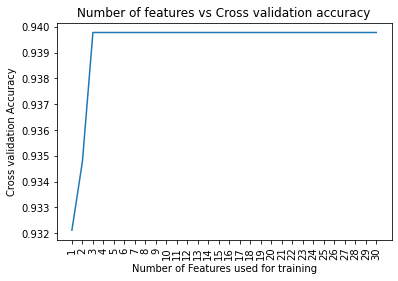

In [27]:
import matplotlib.pyplot as plt
n = np.arange(1,31)[::-1]
plt.xlabel('Number of Features used for training')
plt.ylabel('Cross validation Accuracy')
plt.title('Number of features vs Cross validation accuracy')
plt.plot(n,cross_val_train)
plt.xticks(n,rotation=90)
plt.show()

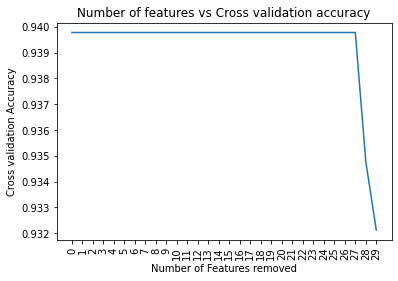

In [28]:
n = np.arange(0,30)
plt.xlabel('Number of Features removed')
plt.ylabel('Cross validation Accuracy')
plt.title('Number of features vs Cross validation accuracy')
plt.plot(n,cross_val_train)
plt.xticks(n,rotation=90)
plt.show()

## Standardization 

**Standardization helped the model in improving the accuracy from 93.9% to 97.2% (when all features are included).**

**The first 5 important features['worst texture','mean area','worst area','area error','worst fractal dimension']**(Ranking of features were decided from cross validation accuracy vs features removed plot and removed_features list in below cells).

**and with K = 9**(Decided using the cross validation score of scaled training data in the last cell of this part 4).

**Model was able to achieve an accuracy of 94.7% on scaled training data.**


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[columns] = scaler.transform(x_train) #Scaling the 'Train Dataset'
x_test_scaled[columns] = scaler.transform(x_test) #Scaling the 'Test Dataset'
x_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
246,-0.249954,-0.419449,-0.307899,-0.311134,-1.715550,-1.107108,-0.578936,-0.965255,-1.164299,-0.902721,-0.829160,0.718430,-0.932424,-0.551815,-0.266229,-0.564208,-0.034861,-1.054533,-0.119939,-0.644252,-0.465473,0.371376,-0.548759,-0.476275,-0.960936,-0.660001,-0.200445,-0.977189,-0.207395,-0.668322
232,-0.797199,3.420312,-0.842679,-0.737060,-1.309897,-1.285700,-1.069463,-1.082562,0.163002,-0.630025,-0.617289,0.803169,-0.641973,-0.512627,-0.869062,-1.076951,-1.062835,-1.374346,-0.174742,-0.521573,-0.788252,2.679917,-0.837848,-0.703522,-1.407509,-1.181750,-1.209083,-1.273479,0.029067,-0.607161
15,0.120403,1.950514,0.197216,0.011338,1.281976,1.040878,0.961143,0.625344,1.861057,1.134725,-0.109006,-0.327906,0.013429,-0.160138,-0.473512,0.978584,0.584899,-0.156157,-0.245032,0.744966,0.253628,1.910955,0.503593,0.115159,1.575215,2.567271,2.107578,0.852039,2.175283,2.817258
128,0.275179,-0.663243,0.311468,0.054536,1.360952,1.439420,0.321040,0.922676,0.741379,0.272838,0.102865,-0.263431,-0.025707,-0.009778,0.603790,0.946816,0.011752,1.745788,0.345886,0.536756,-0.022164,-1.197968,-0.031103,-0.197892,0.291756,0.215418,-0.365443,0.416938,-0.498045,-0.342320
262,0.880465,0.682314,0.905579,0.806510,-0.434691,0.435547,0.106012,0.661684,1.138086,-1.144332,1.508034,0.777379,1.553857,1.044182,-0.121701,1.984201,0.546491,1.568294,0.815285,0.905660,0.852198,0.275463,0.909021,0.724966,-0.815887,0.205231,-0.200445,0.575020,0.285233,-0.507846


In [30]:
removed_features_scaled,cross_val_scaled = Feature_selector(x_train_scaled,y_train,threshold=0.95)

cv_score with all features is: 0.9724050632911393
length of features is 30
knn running after removal of mean radius feature
knn running after removal of mean texture feature
knn running after removal of mean perimeter feature
knn running after removal of mean area feature
knn running after removal of mean smoothness feature
knn running after removal of mean compactness feature
knn running after removal of mean concavity feature
knn running after removal of mean concave points feature
knn running after removal of mean symmetry feature
knn running after removal of mean fractal dimension feature
knn running after removal of radius error feature
knn running after removal of texture error feature
knn running after removal of perimeter error feature
knn running after removal of area error feature
knn running after removal of smoothness error feature
knn running after removal of compactness error feature
knn running after removal of concavity error feature
knn running after removal of concave

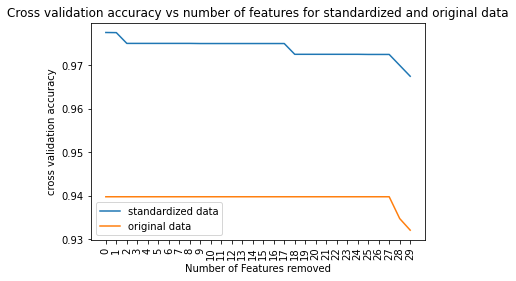

In [31]:
plt.title('Cross validation accuracy vs number of features for standardized and original data')
plt.xlabel('Number of Features removed')
plt.ylabel('cross validation accuracy')
plt.plot(np.arange(0,30),cross_val_scaled,label='standardized data')
plt.plot(np.arange(0,30),cross_val_train,label='original data')
plt.xticks(np.arange(0,30),rotation=90)
plt.legend()
plt.show()

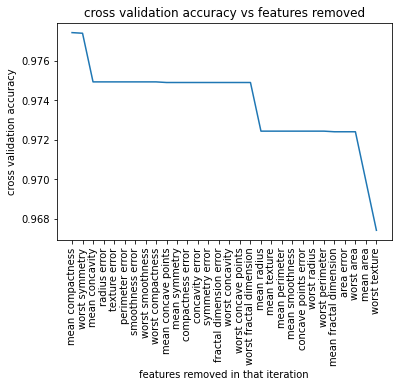

In [32]:
plt.plot(removed_features_scaled,cross_val_scaled,label='standardized data')
plt.xticks(rotation=90)
plt.ylabel('cross validation accuracy')
plt.title('cross validation accuracy vs features removed')
plt.xlabel('features removed in that iteration')
plt.show()

From the above plot, we can see there are so many redundant features in the dataset.

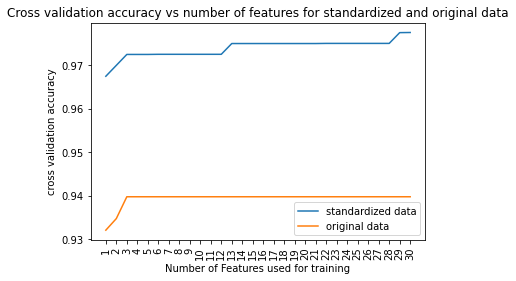

In [33]:
plt.title('Cross validation accuracy vs number of features for standardized and original data')
plt.xlabel('Number of Features used for training')
plt.ylabel('cross validation accuracy')
plt.plot(np.arange(1,31)[::-1],cross_val_scaled,label='standardized data')
plt.plot(np.arange(1,31)[::-1],cross_val_train,label='original data')
plt.xticks(np.arange(1,31)[::-1],rotation=90)
plt.legend()
plt.show()

In [34]:
removed_features_scaled[::-1] #In the order of most important to least important

['worst texture',
 'mean area',
 'worst area',
 'area error',
 'mean fractal dimension',
 'worst perimeter',
 'worst radius',
 'concave points error',
 'mean smoothness',
 'mean perimeter',
 'mean texture',
 'mean radius',
 'worst fractal dimension',
 'worst concave points',
 'worst concavity',
 'fractal dimension error',
 'symmetry error',
 'concavity error',
 'compactness error',
 'mean symmetry',
 'mean concave points',
 'worst compactness',
 'worst smoothness',
 'smoothness error',
 'perimeter error',
 'texture error',
 'radius error',
 'mean concavity',
 'worst symmetry',
 'mean compactness']

In [35]:
cross_val_scaled[::-1] #Cross val score of model when the feature is removed, in the same order as removed_features displayed above

[0.9674050632911392,
 0.9699050632911392,
 0.9724050632911393,
 0.9724050632911393,
 0.9724050632911393,
 0.9724367088607595,
 0.9724367088607595,
 0.9724367088607595,
 0.9724367088607595,
 0.9724367088607595,
 0.9724367088607595,
 0.9724367088607595,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749050632911394,
 0.9749367088607596,
 0.9749367088607596,
 0.9749367088607596,
 0.9749367088607596,
 0.9749367088607596,
 0.9749367088607596,
 0.9749367088607596,
 0.9774050632911392,
 0.9774367088607596]

In [36]:
# finding the best K for scaled data.
ss = []
for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    s1 = cross_val_score(knn,np.array(x_train_scaled[['worst texture','mean area','worst area','area error','mean fractal dimension']]), np.array(y_train), cv=5)
    ss.append(s1.mean())
print('Best number of nearest neighbors using scaled train data:',ss.index(max(ss))+1) # +1 since the indexing of list starts from 0 and we are testing K's from 1.
print('max accuracy:',max(ss))

Best number of nearest neighbors using scaled train data: 9
max accuracy: 0.9472784810126583


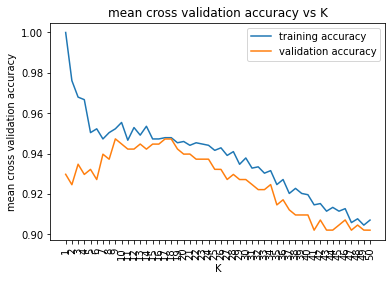

In [37]:
train_scores = []
validation_scores = []
for i in range(1,51):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_validate(knn, x_train_scaled[['worst texture','mean area','worst area','area error','mean fractal dimension']], y_train, cv=5,scoring='accuracy',return_train_score=True)
    train_scores.append(score['train_score'].mean())
    validation_scores.append(score['test_score'].mean())
plt.plot(np.arange(1,51),train_scores,label='training accuracy')
plt.plot(np.arange(1,51),validation_scores,label='validation accuracy')
plt.xticks(np.arange(1,51),rotation=90)
plt.legend()
plt.xlabel('K')
plt.ylabel('mean cross validation accuracy')
plt.title('mean cross validation accuracy vs K')
plt.show()

**From this plot, we can see that using top 5 features the best K value for scaled training data is 9.**

## Part 5: Test Data

In [38]:
from sklearn.metrics import accuracy_score
classifier = neighbors.KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train_scaled[['worst texture','mean area','worst area','area error','mean fractal dimension']],np.array(y_train))
predicts = classifier.predict(x_test_scaled[['worst texture','mean area','worst area','area error','mean fractal dimension']])
print('The accuracy of test dataset is',accuracy_score(predicts,y_test))

The accuracy of test dataset is 0.9181286549707602


*The accuracy on original training data with all features included is 93.9% and on scaled training data with all features included is 97.2%.*

*But, when I select top 5 features from the dataset according to its importance we found from 'Feature selection' function, the accuracy on scaled train dataset is 94.7% which is more than the accuracy of unscaled trained data with all features included.*

*And by training a model with best featues, best nearest neighbors and scaling the data (As KNN algorithm is sensitive to magnitudes and distances between data points), the model predicted **91.8%** of the data correctly.*